In [17]:
from tabpfn_time_series import TimeSeriesDataFrame

from gift_eval.data import Dataset, itemize_start
from enum import Enum

from tabpfn_time_series import FeatureTransformer
from tabpfn_time_series.features import (
    RunningIndexFeature,
    CalendarFeature,
    AutoSeasonalFeature,
)

from pathlib import Path
from gluonts.dataset.util import to_pandas
import matplotlib.pyplot as plt
from load_datasets import load_dataset
from load_datasets import to_timeseries_dataframe_list
from load_datasets import transform_data

short_datasets = "m4_yearly m4_quarterly m4_monthly m4_weekly m4_daily m4_hourly electricity/15T electricity/H electricity/D electricity/W solar/10T solar/H solar/D solar/W hospital covid_deaths us_births/D us_births/M us_births/W saugeenday/D saugeenday/M saugeenday/W temperature_rain_with_missing kdd_cup_2018_with_missing/H kdd_cup_2018_with_missing/D car_parts_with_missing restaurant hierarchical_sales/D hierarchical_sales/W LOOP_SEATTLE/5T LOOP_SEATTLE/H LOOP_SEATTLE/D SZ_TAXI/15T SZ_TAXI/H M_DENSE/H M_DENSE/D ett1/15T ett1/H ett1/D ett1/W ett2/15T ett2/H ett2/D ett2/W jena_weather/10T jena_weather/H jena_weather/D bitbrains_fast_storage/5T bitbrains_fast_storage/H bitbrains_rnd/5T bitbrains_rnd/H bizitobs_application bizitobs_service bizitobs_l2c/5T bizitobs_l2c/H"
med_long_datasets = "electricity/15T electricity/H solar/10T solar/H kdd_cup_2018_with_missing/H LOOP_SEATTLE/5T LOOP_SEATTLE/H SZ_TAXI/15T M_DENSE/H ett1/15T ett1/H ett2/15T ett2/H jena_weather/10T jena_weather/H bitbrains_fast_storage/5T bitbrains_rnd/5T bizitobs_application bizitobs_service bizitobs_l2c/5T bizitobs_l2c/H"


In [18]:
ds_name = "m4_monthly"  # Name of the dataset
dataset = load_dataset(ds_name)

print("Dataset sum series length", dataset.sum_series_length)
print("Dataset frequency: ", dataset.freq)
print("Prediction length: ", dataset.prediction_length)
print("Number of windows in the rolling evaluation: ", dataset.windows)


Dataset sum series length 11246411
Dataset frequency:  M
Prediction length:  18
Number of windows in the rolling evaluation:  1


/home/frimarom/projects/finetune-tabpfn-ts/.venv/lib/python3.12/site-packages/gift_eval/data.py:151: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  freq = norm_freq_str(to_offset(self.freq).name)


In [19]:
record = to_timeseries_dataframe_list(dataset, maxdata=2)
train = record[0]["train"]
test = record[0]["test"]
test["target"] = None

transformed_data = transform_data(train, test)
print(transformed_data)
trans_train_data = transformed_data[0]

(                    target  running_index  year  second_of_minute_sin  \
item_id timestamp                                                       
0       1750-01-01  8000.0              0  1750                   0.0   
        1750-02-01  8350.0              1  1750                   0.0   
        1750-03-01  8570.0              2  1750                   0.0   
        1750-04-01  7700.0              3  1750                   0.0   
        1750-05-01  7080.0              4  1750                   0.0   
...                    ...            ...   ...                   ...   
        1788-09-01  5130.0            464  1788                   0.0   
        1788-10-01  5090.0            465  1788                   0.0   
        1788-11-01  5210.0            466  1788                   0.0   
        1788-12-01  4910.0            467  1788                   0.0   
        1789-01-01  6890.0            468  1789                   0.0   

                    second_of_minute_cos  minute_

/home/frimarom/projects/finetune-tabpfn-ts/.venv/lib/python3.12/site-packages/tabpfn_time_series/features/feature_transformer.py:24: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  tsdf = pd.concat([train_tsdf, test_tsdf])


In [23]:
print(trans_train_data.columns)

Index(['target', 'running_index', 'year', 'second_of_minute_sin',
       'second_of_minute_cos', 'minute_of_hour_sin', 'minute_of_hour_cos',
       'hour_of_day_sin', 'hour_of_day_cos', 'day_of_week_sin',
       'day_of_week_cos', 'day_of_month_sin', 'day_of_month_cos',
       'day_of_year_sin', 'day_of_year_cos', 'week_of_year_sin',
       'week_of_year_cos', 'month_of_year_sin', 'month_of_year_cos', 'sin_#0',
       'cos_#0', 'sin_#1', 'cos_#1', 'sin_#2', 'cos_#2', 'sin_#3', 'cos_#3',
       'sin_#4', 'cos_#4'],
      dtype='object')


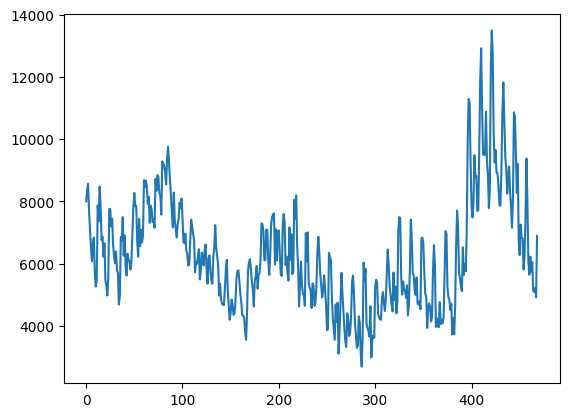

In [21]:
plt.plot(trans_train_data["running_index"], trans_train_data["target"])

(0.0, 100.0)

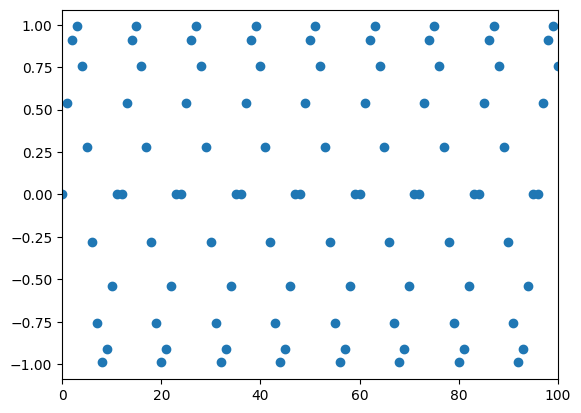

In [38]:
plt.plot(trans_train_data["running_index"], trans_train_data["month_of_year_sin"])
plt.xlim([0, 100])

(0.0, 100.0)

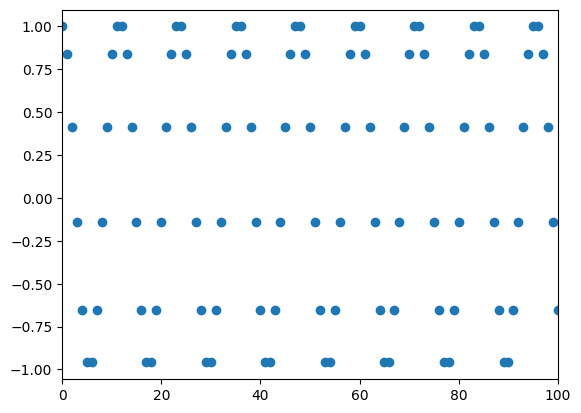

In [37]:
plt.plot(trans_train_data["running_index"], trans_train_data["month_of_year_cos"])
plt.xlim([0, 100])

(0.0, 100.0)

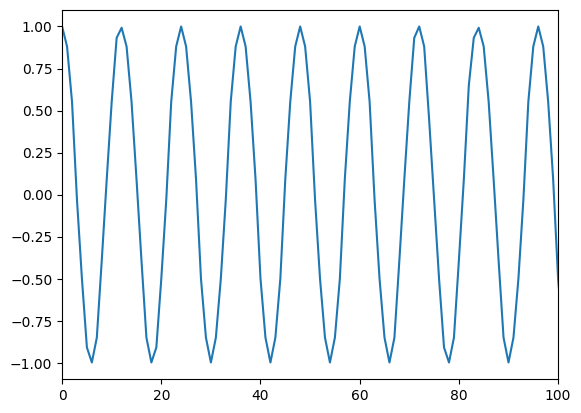

In [29]:
plt.plot(trans_train_data["running_index"], trans_train_data["week_of_year_cos"])
plt.xlim([0, 100])

(0.0, 100.0)

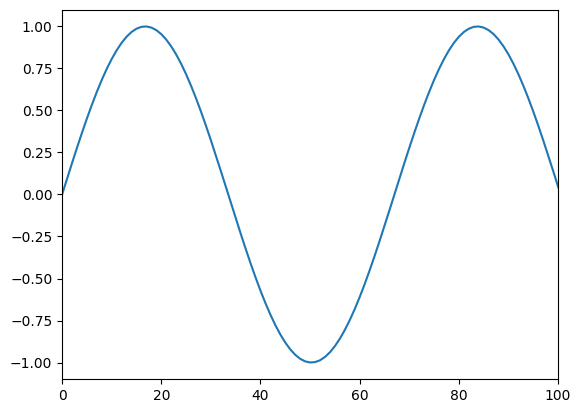

In [44]:
plt.plot(trans_train_data["running_index"], trans_train_data["sin_#4"])
plt.xlim([0, 100])

(0.0, 100.0)

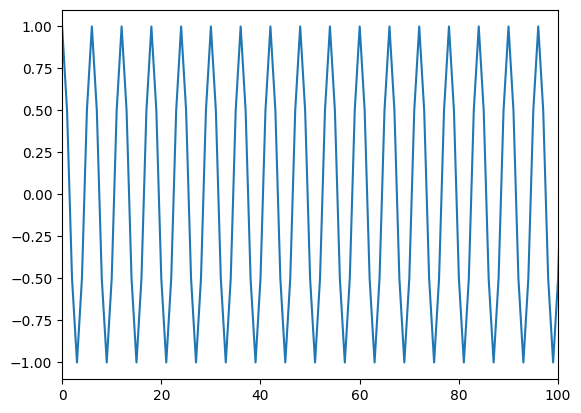

In [30]:
plt.plot(trans_train_data["running_index"], trans_train_data["cos_#3"])
plt.xlim([0, 100])